In [82]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [6]:
#! pip install statsmodels
data = pd.read_csv('preprocess_data.csv')

C:\Users\vferr\AppData\Local\Temp\ipykernel_6508\35566496.py:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('preprocess_data.csv')


In [44]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'data_inversa', 'dia_semana', 'horario',
       'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'ano'],
      dtype='object')

In [29]:
## Let's check if there are significant differences between features values:
### States, cities, weather, fase_dia, dia_semana


In [46]:
h = dict()
p=dict()
colunas = ['uf', 'municipio', 'condicao_metereologica',
           'tipo_pista', 'tracado_via', 'fase_dia', 'dia_semana']

for i in colunas:

    grouped_data = data.groupby(
        i).size().reset_index(name='num_accidents')

    compared = grouped_data[i].unique()
    compared = compared.tolist()

    n_acc = [
        grouped_data[grouped_data[i] == comp]['num_accidents']
        for comp in compared
        if comp != 'Unknown'  # Exclude 'Unknown' state
    ]

    h_statistic, p_value = stats.kruskal(*n_acc)

    h[i] = h_statistic
    p[i] = p_value


In [47]:

h

{'uf': 26.0,
 'municipio': 2340.0,
 'condicao_metereologica': 9.0,
 'tipo_pista': 3.0,
 'tracado_via': 11.0,
 'fase_dia': 3.0,
 'dia_semana': 6.0}

In [48]:
p

{'uf': 0.46310474709968075,
 'municipio': 0.4961122535053461,
 'condicao_metereologica': 0.4372741889138671,
 'tipo_pista': 0.3916251762710877,
 'tracado_via': 0.4432632784264654,
 'fase_dia': 0.3916251762710877,
 'dia_semana': 0.42319008112684364}

In [49]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'data_inversa', 'dia_semana', 'horario',
       'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'ano'],
      dtype='object')

In [78]:
# Let's check if there are any features strongly correlated to the number of the accidents


In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
grouped_data = data.groupby(
    'condicao_metereologica').size().reset_index(name='num_accidents')

grouped_data['condicao_metereologica_encoded'] = label_encoder.fit_transform(
    grouped_data['condicao_metereologica'])

corr_coeff, p_value = stats.pointbiserialr(
    grouped_data['condicao_metereologica_encoded'], grouped_data['num_accidents'])

print(corr_coeff)


### Correlation closer of -1 means that these both situation are not correlated. 
### Weather is not correlated to the number of accicents, now, let's try Doing It for every feature. : ) 


-0.5382541246163971


In [74]:
corr_ = dict()

for i in data.columns:
    grouped_data = data.groupby(i).size().reset_index(name='num_accidents')
    label_encoder = LabelEncoder()

    if grouped_data[i].dtype == 'O':
        grouped_data['encoded'] = label_encoder.fit_transform(
            grouped_data[i].astype(str))  # Convert to string before encoding
        # Perform Point-Biserial Correlation
        corr_coeff, p_value = stats.pointbiserialr(
            grouped_data['encoded'], grouped_data['num_accidents'])
    	
    if abs(corr_coeff) > abs(1 - corr_coeff) and corr_coeff > 0:
        corr_[i] = corr_coeff



In [80]:
columns = corr_.keys()

In [83]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'data_inversa', 'dia_semana', 'horario',
       'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'ano', 'condicao_metereologica_encoded',
       'tipo_acidente_encoded'],
      dtype='object')

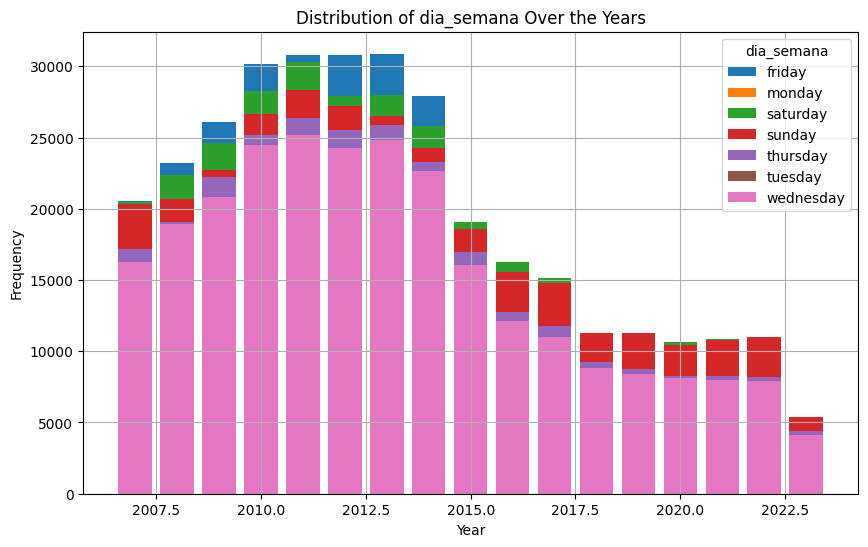

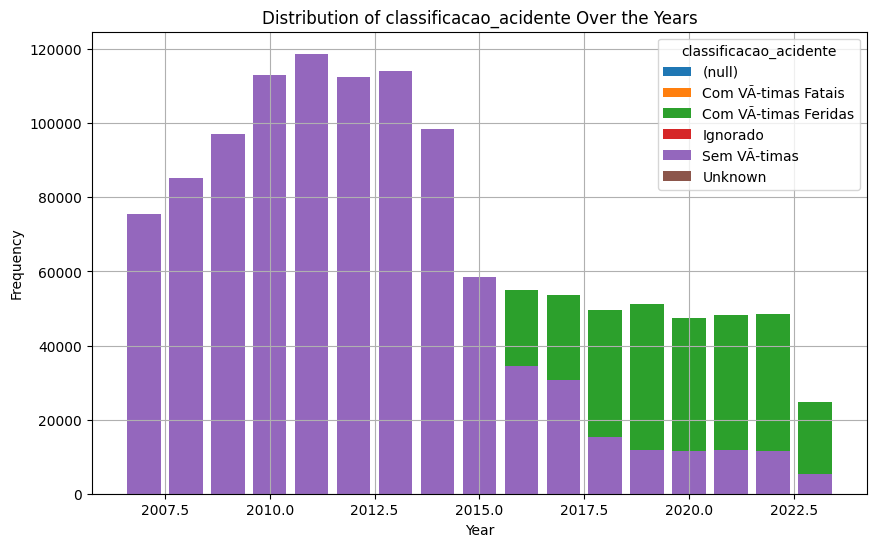

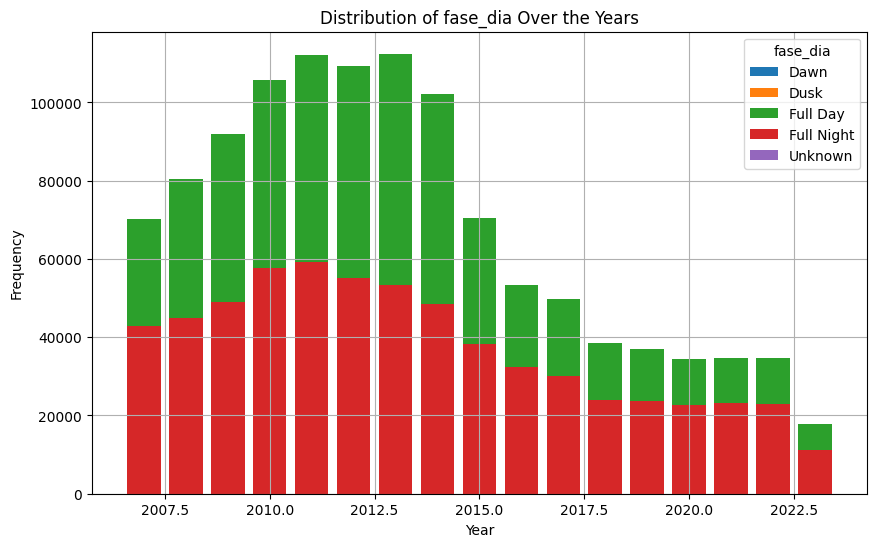

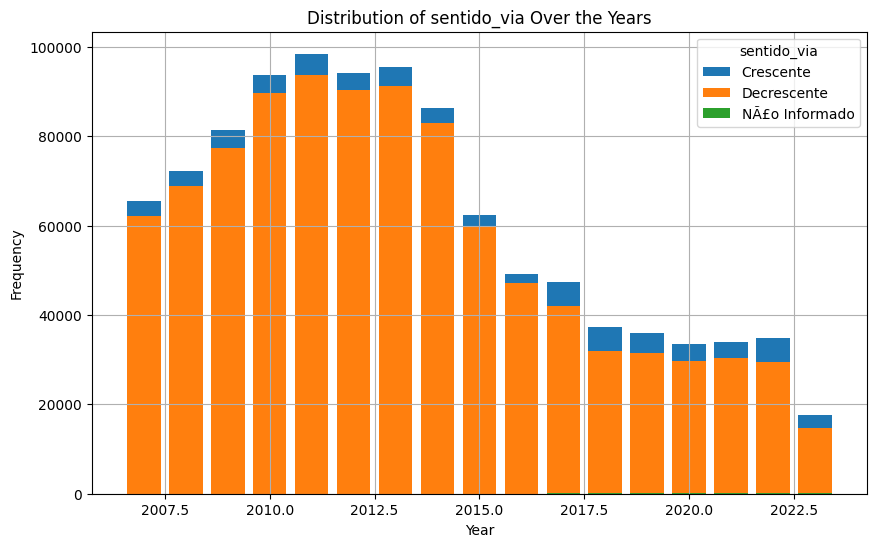

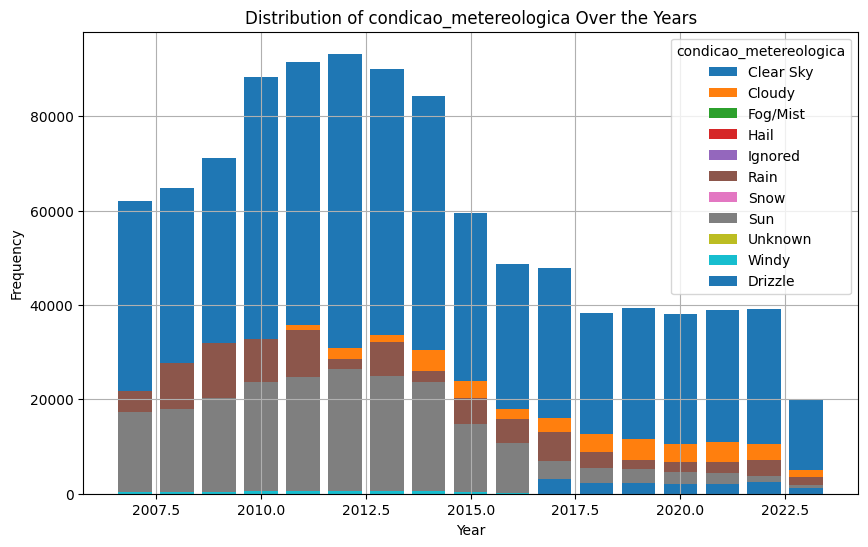

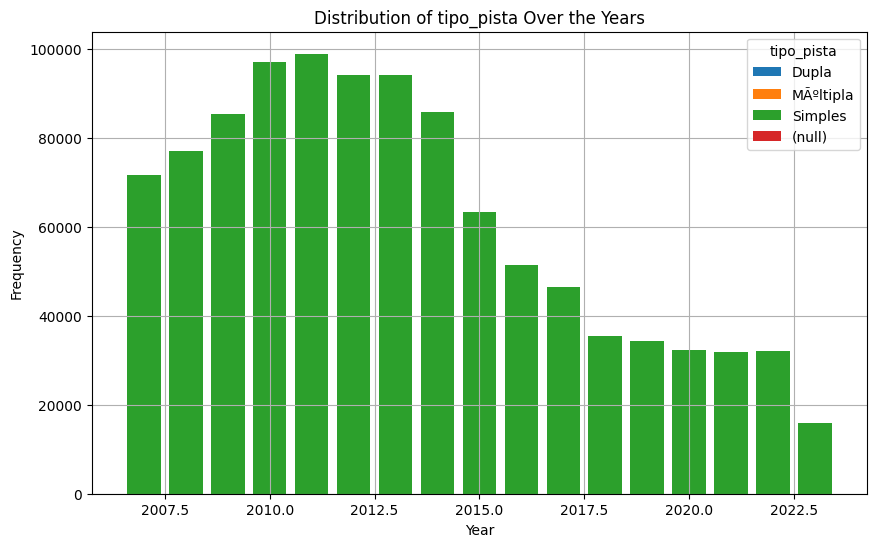

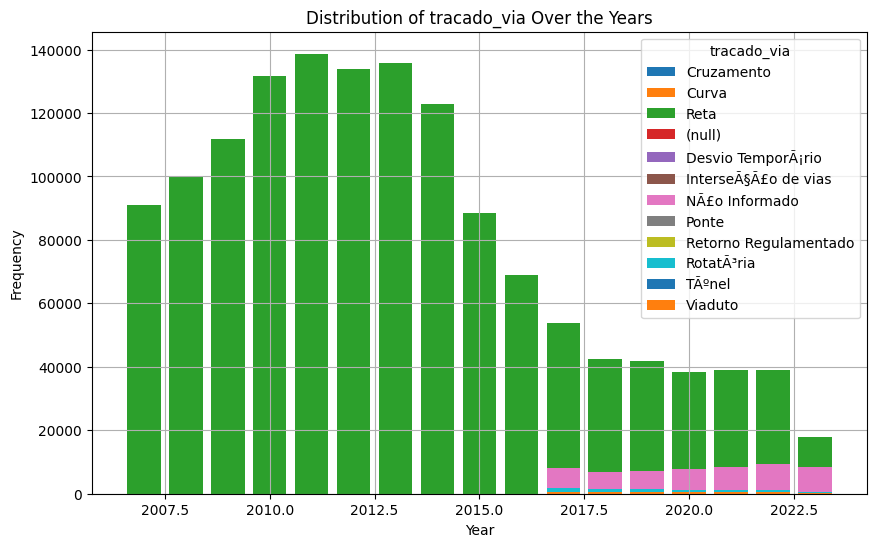

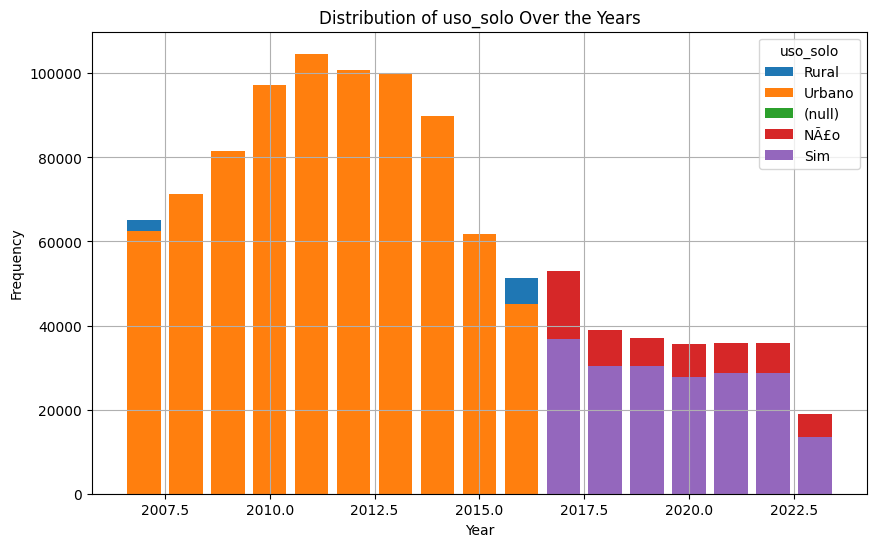

In [95]:
## Now, Let's check any trends thorugh the years:
columns_to_analyze = ['dia_semana',
                      'classificacao_acidente', 'fase_dia', 'sentido_via',
                      'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
                      'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
                      'ignorados', 'feridos', 'veiculos'
                      ]

# Assuming your date column is named 'ano' and you have other columns you want to analyze
# If not, replace these with your actual column names.

# Step 3: Loop Through Columns and Analyze Trends
for col in columns_to_analyze:
    # Check if the column is of type 'object' (i.e., string)
    if data[col].dtype == 'O':
        # Group data by year and count the frequency of each unique value
        grouped_data = data.groupby(
            [data['ano'], col]).size().reset_index(name='count')

        # Plot the trend as a bar chart
        plt.figure(figsize=(10, 6))
        for value in grouped_data[col].unique():
            plt.bar(grouped_data[grouped_data[col] == value]['ano'],
                    grouped_data[grouped_data[col] == value]['count'],
                    label=str(value))  # Convert value to string for legend

        plt.title(f'Distribution of {col} Over the Years')
        plt.xlabel('Year')
        plt.ylabel('Frequency')
        plt.legend(title=col)
        plt.grid(True)
        plt.show()
